<a href="https://colab.research.google.com/github/abishek-bupathi/handwritten-digit-recognition/blob/master/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwriting Recognition for Numbers 

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import datetime
import os

print(tf.__version__)

2.3.0


### 1. Loading data
mnist database of handwritten digits is used to train the model,
dataset can be found at https://www.tensorflow.org/datasets/catalog/mnist

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Data loaded!")
x_train, x_test = x_train / 255, x_test / 255
print("x_train shape: ", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
Data loaded!
x_train shape:  (60000, 28, 28)


### 2. Building the Model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

### 3. Compile the Model

In [6]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 4. Train the Model

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.9140 - val_loss: 0.1313 - val_accuracy: 0.9615
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9586 - val_loss: 0.1019 - val_accuracy: 0.9700
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9674 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9739 - val_loss: 0.0806 - val_accuracy: 0.9756
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0750 - accuracy: 0.9767 - val_loss: 0.0700 - val_accuracy: 0.9791
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9783 - val_loss: 0.0745 - val_accuracy: 0.9775
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9802 - val_loss: 0.0726 - val_accuracy:

### 5. Plotting and Evaluating the Model

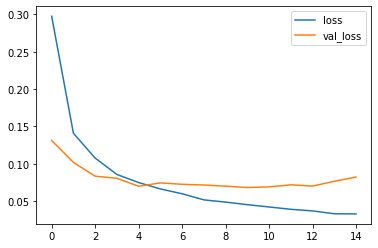

In [8]:
# Plotting loss per iteration
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

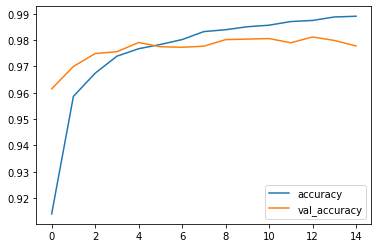

In [9]:
# Plotting accuracy per iteration
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

In [10]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9778
[0.08232805132865906, 0.9778000116348267]


In [11]:
# Plotting the confusion matrix

def plot_confusion_matrix(cm,
                          classes,
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Noramlization can be applied by setting 'normalize = True'
  """
  if normalize:
    cm = cm.astype("float") / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else "d"
  thresh = cm.max()/2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = "center",
             color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted label")
  plt.show()



### 6. Saving the Model

In [12]:
def save_model(model, suffix = None):
  """
  Saves the model in a models directory amd appends a suffix
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/My Drive/Handwritten digit recognition/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  model_path = modeldir + "-" + suffix + ".h5" # format to save the model
  
  print (f"Saving model to: {model_path}...")
  model.save(model_path)
  print("Done!")

In [18]:
# Function to load a model
def load_model(model_path):
  """
  Load the model from specified path
  """
  print(f"Loading model from: {model_path}...")
  model = tf.keras.models.load_model(model_path)
  print("Done!")
  return model

In [16]:
# Saving the model
save_model(model, suffix="handwritten-digit-recognition")

Saving model to: /content/drive/My Drive/Handwritten digit recognition/models/20200813-09371597311448-handwritten-digit-recognition.h5...
Done!


In [19]:
# Loading the saved model
model = load_model("/content/drive/My Drive/Handwritten digit recognition/models/20200813-09371597311448-handwritten-digit-recognition.h5")

Loading model from: /content/drive/My Drive/Handwritten digit recognition/models/20200813-09371597311448-handwritten-digit-recognition.h5...
Done!


### 7. Making Prediction

In [20]:
y_pred = model.predict(x_test).argmax(axis = 1)

Confusion matrix, without normalization
[[ 971    1    1    0    1    2    2    1    1    0]
 [   0 1123    2    2    0    0    3    0    5    0]
 [   4    4  998    8    3    0    2    4    9    0]
 [   1    0    2  992    1    3    0    4    1    6]
 [   0    0    0    0  966    0    6    0    2    8]
 [   3    0    0   17    2  861    2    0    6    1]
 [   2    2    1    1    6    2  942    0    2    0]
 [   2    3   11    4    4    0    0  994    3    7]
 [   7    0    2    5    4    3    1    3  945    4]
 [   1    2    0    3   11    4    0    2    0  986]]


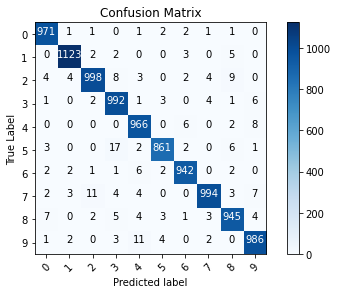

In [21]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10)))

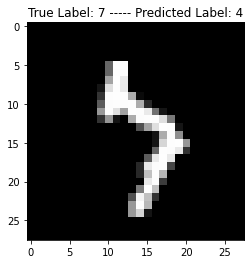

In [22]:
# Examining misclassified examples
misclassified_ids = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_ids)
plt.imshow(x_test[i], cmap = "gray")
plt.title("True Label: %s ----- Predicted Label: %s" % (y_test[i], y_pred[i]));

### 8. Using the Model to predict Real Images

In [23]:
# Define image size
IMG_SIZE = 28

# Creating the preprocessing function
def process_image(image_path):
  """
  Takes an image file path and turns the image into tensors
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn jpg image into numerical tensor with 3 colour channels
  image = tf.image.decode_jpeg(image, channels = 1)

  # Normalization (Convert the colour channel values from 0-255 to 0-1 values)
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE],)

  return image

In [24]:
# Define the batch size (32)
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Accepts test data as input (no labels)
  """
  # If test dataset (no labels)
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x)) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If valid dataset, no shuffling 
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data_batch  = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  # If Train dataset
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    # Shuffling pathnames and labels 
    data = data.shuffle(buffer_size = len(x))
    data_batch  = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [25]:
unique_digits = np.unique(y_train)
# Create a function to unbatch dataset
def unbatch_data(data):
  """
  Takes in a batched dataset of (image, lablel) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels 


In [26]:
# Turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_digits[np.argmax(prediction_probabilities)]

Creating test data batches...
Number of images Found: 4


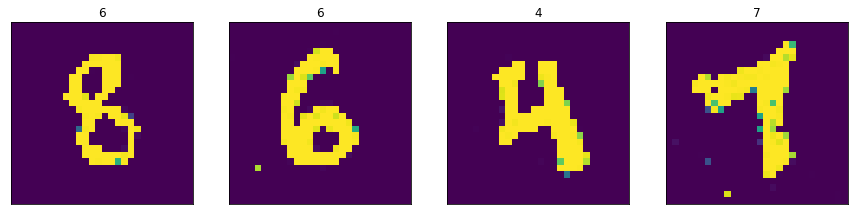

In [29]:
# Get custom image filepaths
custom_path = "/content/drive/My Drive/Handwritten digit recognition/custom data/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

# Turn the images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)

# Make prediction on the custom data
custom_preds = model.predict(custom_data)
print(f"Number of images Found: {len(custom_image_paths)}")

# Get the image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

# Get custom images
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

  # Check custom image predictions
plt.figure(figsize = (15, 15))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image.reshape(28, 28))